# Declaration of Originality

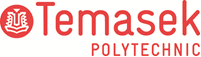

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Isabella Keh Jia XIn
* Tutorial Group                :  PC01
* Tutor						    :  Mr Ruchir Srivastava
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [12]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine Learning - Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier

# Machine Learning - Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif, chi2

# Model persistence
import joblib

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# 1. Business Understanding

**Goal:** Predict which bank clients are likely to subscribe to a term deposit during direct marketing campaigns (phone calls), enabling targeted marketing efforts and resource optimization.

**Business Problem:**
- Direct marketing campaigns are expensive (staff time, phone costs, opportunity costs)
- Low conversion rates (~11%) mean most calls are unproductive
- Banks need to identify high-potential customers to maximize ROI
- Better targeting = reduced costs + improved customer experience (fewer unwanted calls)

**Dataset Source:**
- **Company:** Portuguese Banking Institution 
- **Period:** May 2008 - November 2010 (actual campaign data)
- **Type:** Direct marketing campaigns via phone calls
- **Reference:** Moro et al. (2014), "A Data-Driven Approach to Predict the Success of Bank Telemarketing", Decision Support Systems, Elsevier

**Success Criteria:**
- Develop binary classification model with F1-Score > 0.50
- Balance precision (avoid wasting calls on non-subscribers) and recall (catch potential subscribers)
- Deploy as accessible web application for marketing team

**Business Impact:**
- Improved campaign efficiency (call right customers)
- Reduced marketing costs (fewer wasted calls)
- Better customer experience (relevant offers only)
- Increased subscription rates

# 2. Data Understanding

## 2.1 Load dataset

In [26]:
df = pd.read_csv('bank.csv', sep=';')

# Rename economic indicator columns for better readability
# Original names used European convention with dots (e.g., emp.var.rate)
df = df.rename(columns={
    'emp.var.rate': 'employment_variation_rate',
    'cons.price.idx': 'consumer_price_index',
    'cons.conf.idx': 'consumer_confidence_index',
    'euribor3m': 'euribor_3month_rate',
    'nr.employed': 'num_employees'
})

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nFirst few rows:")
df.head()

Dataset loaded successfully!
Shape: 41188 rows × 21 columns

First few rows:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3month_rate,num_employees,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2.2 Summary Statistics

In [14]:
print("DATASET INFORMATION")
df.info()

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.i

In [15]:
print("DATA TYPES DISTRIBUTION")
print(df.dtypes.value_counts())

DATA TYPES DISTRIBUTION
object     11
int64       5
float64     5
Name: count, dtype: int64


In [28]:
column_descriptions = {
    'age': 'Client age (numeric)',
    'job': 'Type of job (categorical)',
    'marital': 'Marital status (categorical)',
    'education': 'Education level (categorical)',
    'default': 'Has credit in default? (yes/no/unknown)',
    'housing': 'Has housing loan? (yes/no/unknown)',
    'loan': 'Has personal loan? (yes/no/unknown)',
    'contact': 'Contact communication type (cellular/telephone)',
    'month': 'Last contact month of year',
    'day_of_week': 'Last contact day of the week',
    'duration': 'Last contact duration in seconds (NOTE: Should NOT be used for prediction)',
    'campaign': 'Number of contacts during this campaign',
    'pdays': 'Days since last contact from previous campaign (999 = not contacted)',
    'previous': 'Number of contacts before this campaign',
    'poutcome': 'Outcome of previous marketing campaign',
    'emp_var_rate': 'Employment variation rate (quarterly indicator)',
    'consumer_price_idx': 'Consumer price index (monthly indicator)',
    'consumer_confidence_idx': 'Consumer confidence index (monthly indicator)',
    'euribor_3m': 'Euribor (average interest rate at which a panel of European banks lend to one another) 3-month rate (daily indicator)',
    'num_employees': 'Number of employees (quarterly indicator)',
    'y': 'Has client subscribed to term deposit? (TARGET)'
}
print("Column Descriptions:")
for col, desc in column_descriptions.items():
    print(f"{col:20s}: {desc}")

Column Descriptions:
age                 : Client age (numeric)
job                 : Type of job (categorical)
marital             : Marital status (categorical)
education           : Education level (categorical)
default             : Has credit in default? (yes/no/unknown)
housing             : Has housing loan? (yes/no/unknown)
loan                : Has personal loan? (yes/no/unknown)
contact             : Contact communication type (cellular/telephone)
month               : Last contact month of year
day_of_week         : Last contact day of the week
duration            : Last contact duration in seconds (NOTE: Should NOT be used for prediction)
campaign            : Number of contacts during this campaign
pdays               : Days since last contact from previous campaign (999 = not contacted)
previous            : Number of contacts before this campaign
poutcome            : Outcome of previous marketing campaign
emp_var_rate        : Employment variation rate (quarterly indica

In [17]:
# Statistical summary of numerical features
print("Statistical Summary of Numerical Features:")
df.describe()

Statistical Summary of Numerical Features:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [18]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\nCategorical Features Summary:")
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Value counts:")
    print(df[col].value_counts())
    print(f"  Most common: {df[col].mode()[0]} ({df[col].value_counts().iloc[0]:,} occurrences)")


Categorical Features Summary:

JOB:
  Unique values: 12
  Value counts:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
  Most common: admin. (10,422 occurrences)

MARITAL:
  Unique values: 4
  Value counts:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
  Most common: married (24,928 occurrences)

EDUCATION:
  Unique values: 8
  Value counts:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
  Most common: university.degree (12,168 occurrences)

DEFAULT:
  Un

In [19]:
# Check for missing numerical values
print("Missing Numerical Values Analysis:")
# Get numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate missing values for numerical features
numerical_missing = df[numerical_cols].isnull().sum()
numerical_missing_pct = (numerical_missing / len(df)) * 100

numerical_missing_df = pd.DataFrame({
    'Feature': numerical_cols,
    'Missing Count': numerical_missing.values,
    'Percentage (%)': numerical_missing_pct.values
})

# Display only features with missing values
numerical_with_missing = numerical_missing_df[numerical_missing_df['Missing Count'] > 0]

if len(numerical_with_missing) > 0:
    print("\nNumerical features with missing values:")
    print(numerical_with_missing.to_string(index=False))
else:
    print("\n✓ No missing values (NULL/NaN) in numerical features!")
    
print(f"\nTotal numerical features analyzed: {len(numerical_cols)}")
print(f"Features with missing values: {len(numerical_with_missing)}")

Missing Numerical Values Analysis:

✓ No missing values (NULL/NaN) in numerical features!

Total numerical features analyzed: 10
Features with missing values: 0


In [20]:
#Check for missing categorical values
print("Missing Categorical Values Analysis:")
# Get categorical columns (excluding target)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Calculate NULL/NaN missing values
categorical_missing = df[categorical_cols].isnull().sum()
categorical_missing_pct = (categorical_missing / len(df)) * 100

categorical_missing_df = pd.DataFrame({
    'Feature': categorical_cols,
    'NULL/NaN Count': categorical_missing.values,
    'NULL/NaN (%)': categorical_missing_pct.values
})

# Display NULL/NaN missing values
categorical_with_null = categorical_missing_df[categorical_missing_df['NULL/NaN Count'] > 0]

if len(categorical_with_null) > 0:
    print("\nCategorical features with NULL/NaN values:")
    print(categorical_with_null.to_string(index=False))
else:
    print("\nNo NULL/NaN values in categorical features!")

#Check for 'unknown' values (coded missing data)
print("'Unknown' values in categorical features")

unknown_data = []
for col in categorical_cols:
    if col == 'y':  # Skip target variable
        continue
    unknown_count = (df[col] == 'unknown').sum()
    unknown_pct = (unknown_count / len(df)) * 100
    unknown_data.append({
        'Feature': col,
        'Unknown Count': unknown_count,
        'Unknown (%)': unknown_pct
    })

unknown_df = pd.DataFrame(unknown_data)
unknown_with_values = unknown_df[unknown_df['Unknown Count'] > 0]

if len(unknown_with_values) > 0:
    print("Features with 'unknown' values:")
    print(unknown_with_values.to_string(index=False))
    
    print(f"\n\nSUMMARY:")
    print(f"Total categorical features: {len(categorical_cols) - 1}")  # Exclude target
    print(f"Features with 'unknown' values: {len(unknown_with_values)}")
    print(f"Total 'unknown' values: {unknown_with_values['Unknown Count'].sum():,}")
else:
    print("No 'unknown' values found in categorical features")

Missing Categorical Values Analysis:

No NULL/NaN values in categorical features!
'Unknown' values in categorical features
Features with 'unknown' values:
  Feature  Unknown Count  Unknown (%)
      job            330     0.801204
  marital             80     0.194231
education           1731     4.202680
  default           8597    20.872584
  housing            990     2.403613
     loan            990     2.403613


SUMMARY:
Total categorical features: 10
Features with 'unknown' values: 6
Total 'unknown' values: 12,718


In [21]:
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates:,}")

if duplicates > 0:
    print(f"Duplicate percentage: {(duplicates/len(df))*100:.2f}%")
    print("\nNote: Duplicates may represent legitimate repeat contacts")
else:
    print("No duplicate rows found")


Duplicate Rows: 12
Duplicate percentage: 0.03%

Note: Duplicates may represent legitimate repeat contacts


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [ ]:
#Target Variable Distribution
print("Target Variable Distribution -> y = Term Deposit Subscription")

target_counts = df['y'].value_counts()
target_pct = df['y'].value_counts(normalize=True) * 100

print("\nAbsolute Counts:")
print(target_counts)

print("\nPercentage Distribution:")
for val, pct in target_pct.items():
    print(f"  {val}: {pct:.2f}%")

# Calculate imbalance ratio
imbalance_ratio = target_counts['no'] / target_counts['yes']
print(f"\nClass Imbalance Ratio (No:Yes): {imbalance_ratio:.2f}:1")

print("\nBUSINESS INTERPRETATION:")
print(f"• Only {target_pct['yes']:.1f}% of clients subscribe to term deposits")
print(f"• This means ~{imbalance_ratio:.0f} clients say 'no' for every 1 who says 'yes'")
print(f"• High class imbalance → need appropriate metrics and potentially sampling techniques")
print(f"• Baseline accuracy (always predict 'no'): {target_pct['no']:.2f}%")

Target Variable Distribution -> y = Term Deposit Subscription

Absolute Counts:
y
no     36548
yes     4640
Name: count, dtype: int64

Percentage Distribution:
  no: 88.73%
  yes: 11.27%

Class Imbalance Ratio (No:Yes): 7.88:1

BUSINESS INTERPRETATION:
• Only 11.3% of clients subscribe to term deposits
• This means ~8 clients say 'no' for every 1 who says 'yes'
• High class imbalance → need appropriate metrics and potentially sampling techniques
• Baseline accuracy (always predict 'no'): 88.73%


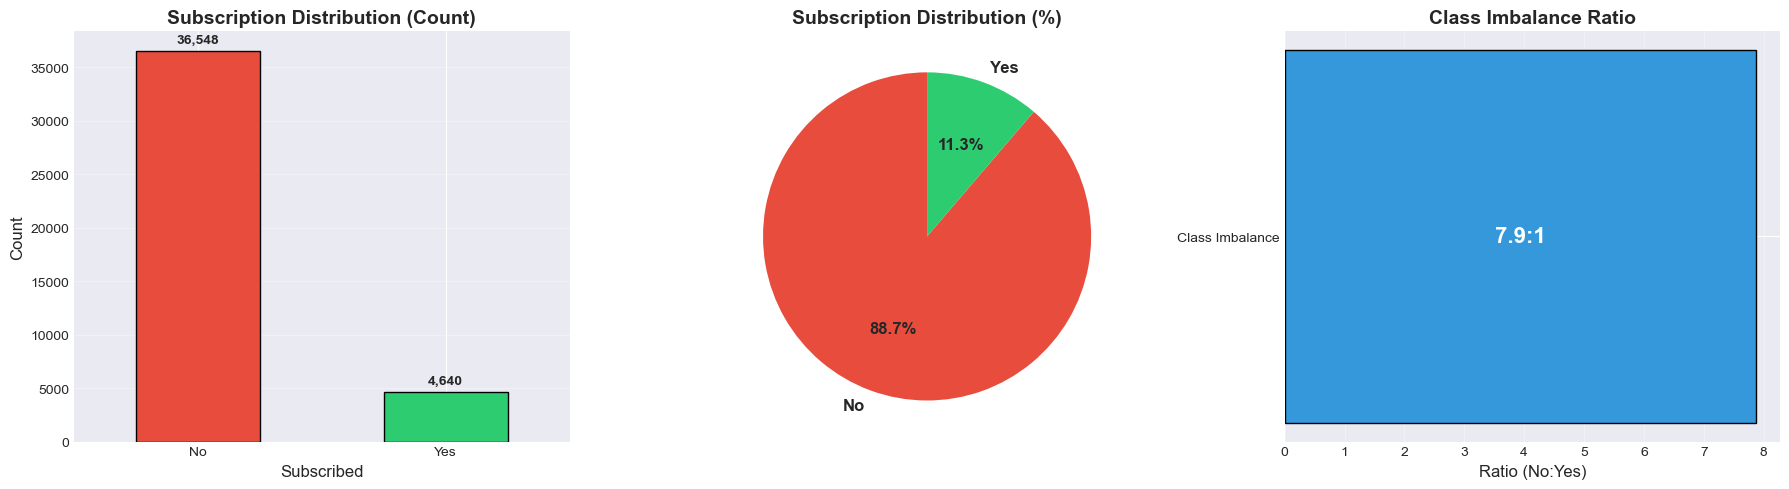


KEY INSIGHT:
Severe class imbalance detected. Standard accuracy is NOT appropriate.
Will use F1-Score as primary metric to balance Precision and Recall.


In [29]:
#Visualising Target Distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Count plot
target_counts.plot(kind='bar', ax=axes[0], color=['#e74c3c', '#2ecc71'], edgecolor='black')
axes[0].set_title('Subscription Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Subscribed', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['No', 'Yes'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(target_counts):
    axes[0].text(i, v + 500, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = ['#e74c3c', '#2ecc71']
axes[1].pie(target_counts, labels=['No', 'Yes'], autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Subscription Distribution (%)', fontsize=14, fontweight='bold')

# Imbalance visualization
axes[2].barh(['Class Imbalance'], [imbalance_ratio], color='#3498db', edgecolor='black')
axes[2].set_title('Class Imbalance Ratio', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Ratio (No:Yes)', fontsize=12)
axes[2].text(imbalance_ratio/2, 0, f'{imbalance_ratio:.1f}:1', 
             ha='center', va='center', fontsize=16, fontweight='bold', color='white')
axes[2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nKEY INSIGHT:")
print("Severe class imbalance detected. Standard accuracy is NOT appropriate.")
print("Will use F1-Score as primary metric to balance Precision and Recall.")

### 2.3.1.2 Understanding distribution of features

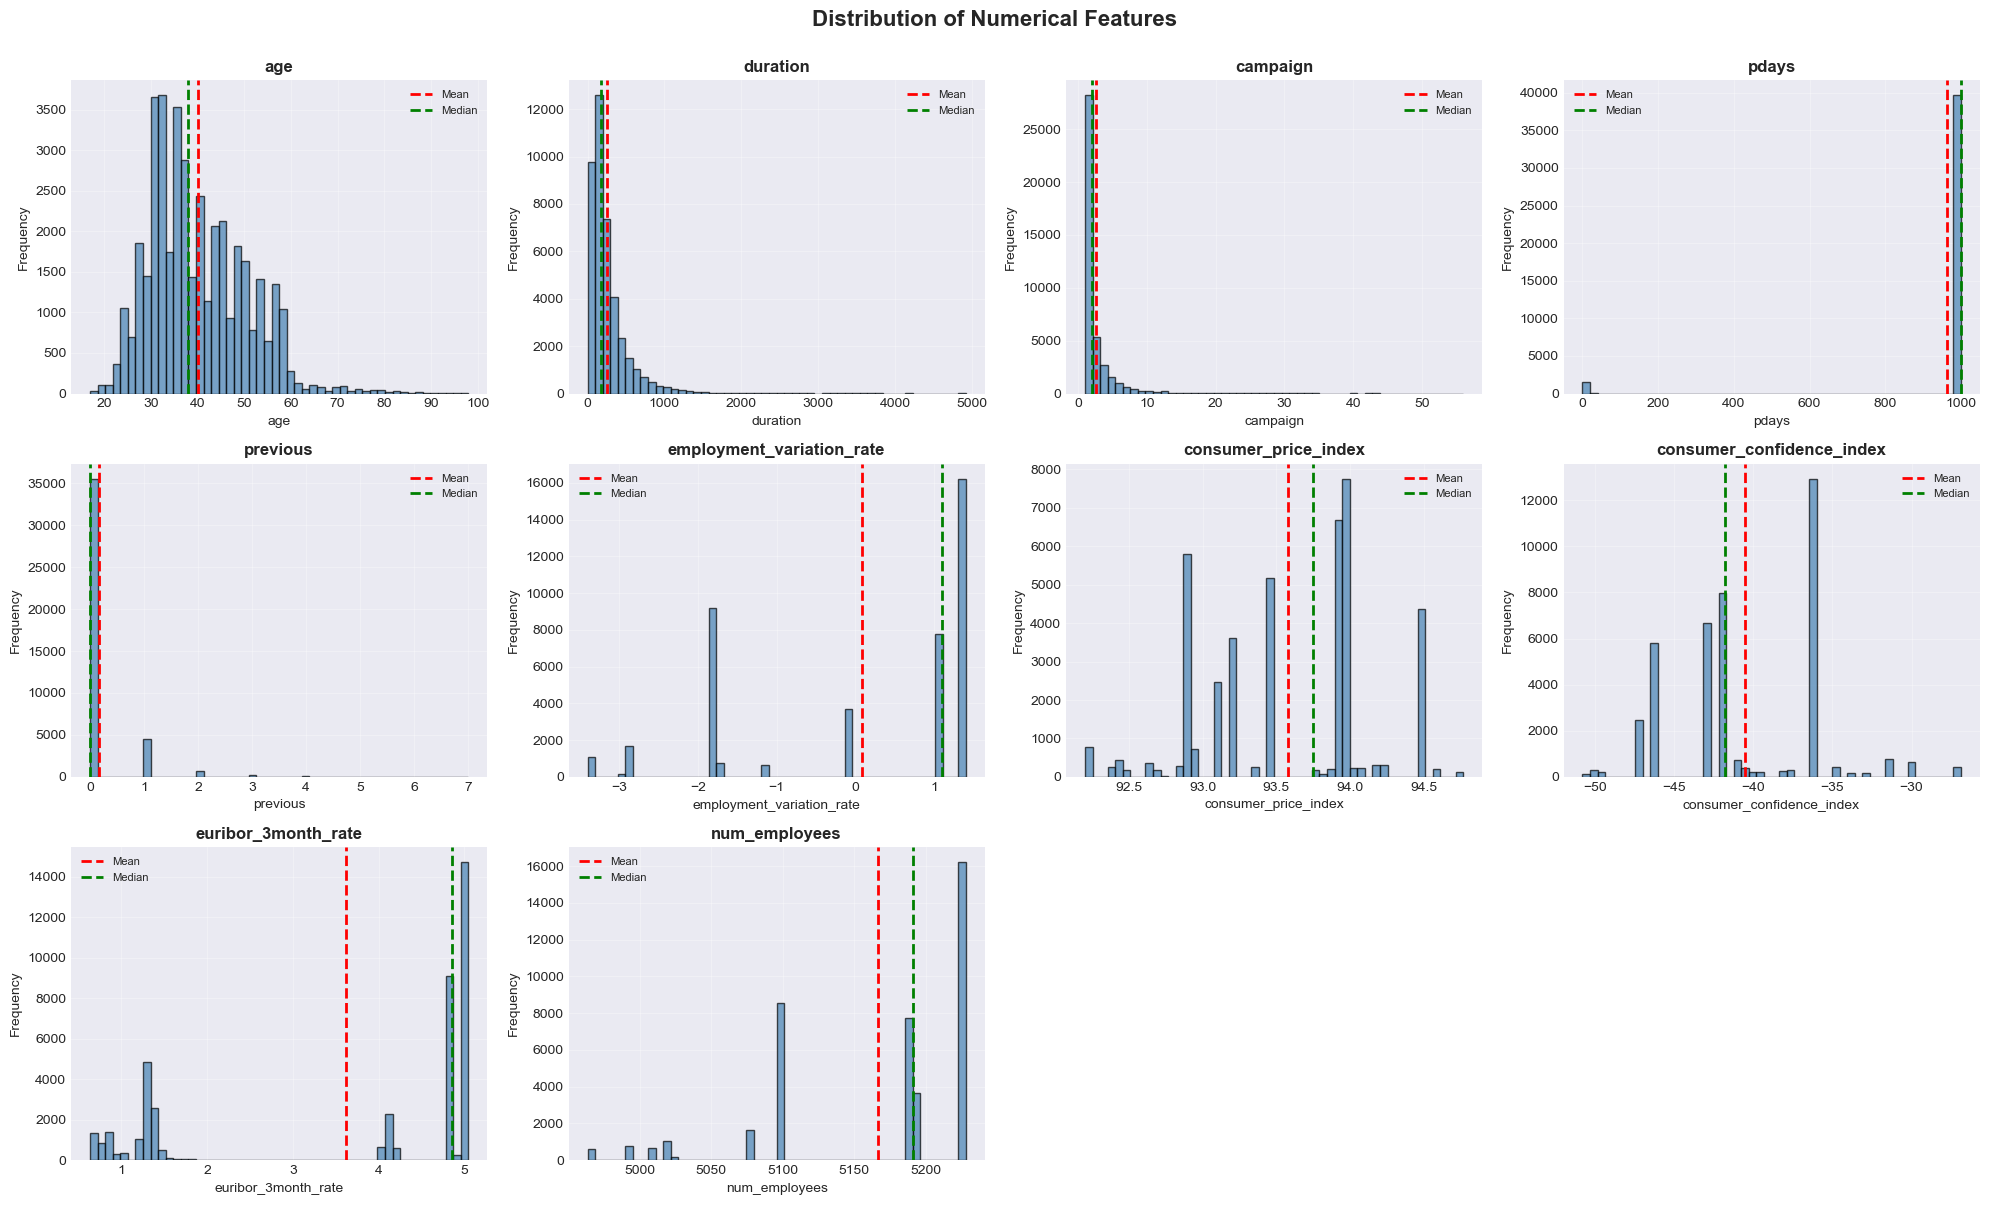


OBSERVATIONS:
• age: Right-skewed (most clients 30-50 years old)
• campaign: Heavily right-skewed (most clients contacted 1-3 times)
• pdays: Bimodal (999 = not previously contacted)
• duration: Right-skewed (most calls short, some very long)
• Economic indicators: Relatively normal distributions


In [ ]:
# Understanding Numerical Features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

n_cols = 4
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, feature in enumerate(numerical_features):
    axes[idx].hist(df[feature], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(True, alpha=0.3)
    
    # Add mean and median lines
    axes[idx].axvline(df[feature].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    axes[idx].axvline(df[feature].median(), color='green', linestyle='--', linewidth=2, label='Median')
    axes[idx].legend(fontsize=8)

# Hide empty subplots
for idx in range(len(numerical_features), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nOBSERVATIONS:")
print("• age: Right-skewed (most clients 30-50 years old)")
print("• campaign: Heavily right-skewed (most clients contacted 1-3 times)")
print("• pdays: Bimodal (999 = not previously contacted)")
print("• duration: Right-skewed (most calls short, some very long)")
print("• Economic indicators: Relatively normal distributions")

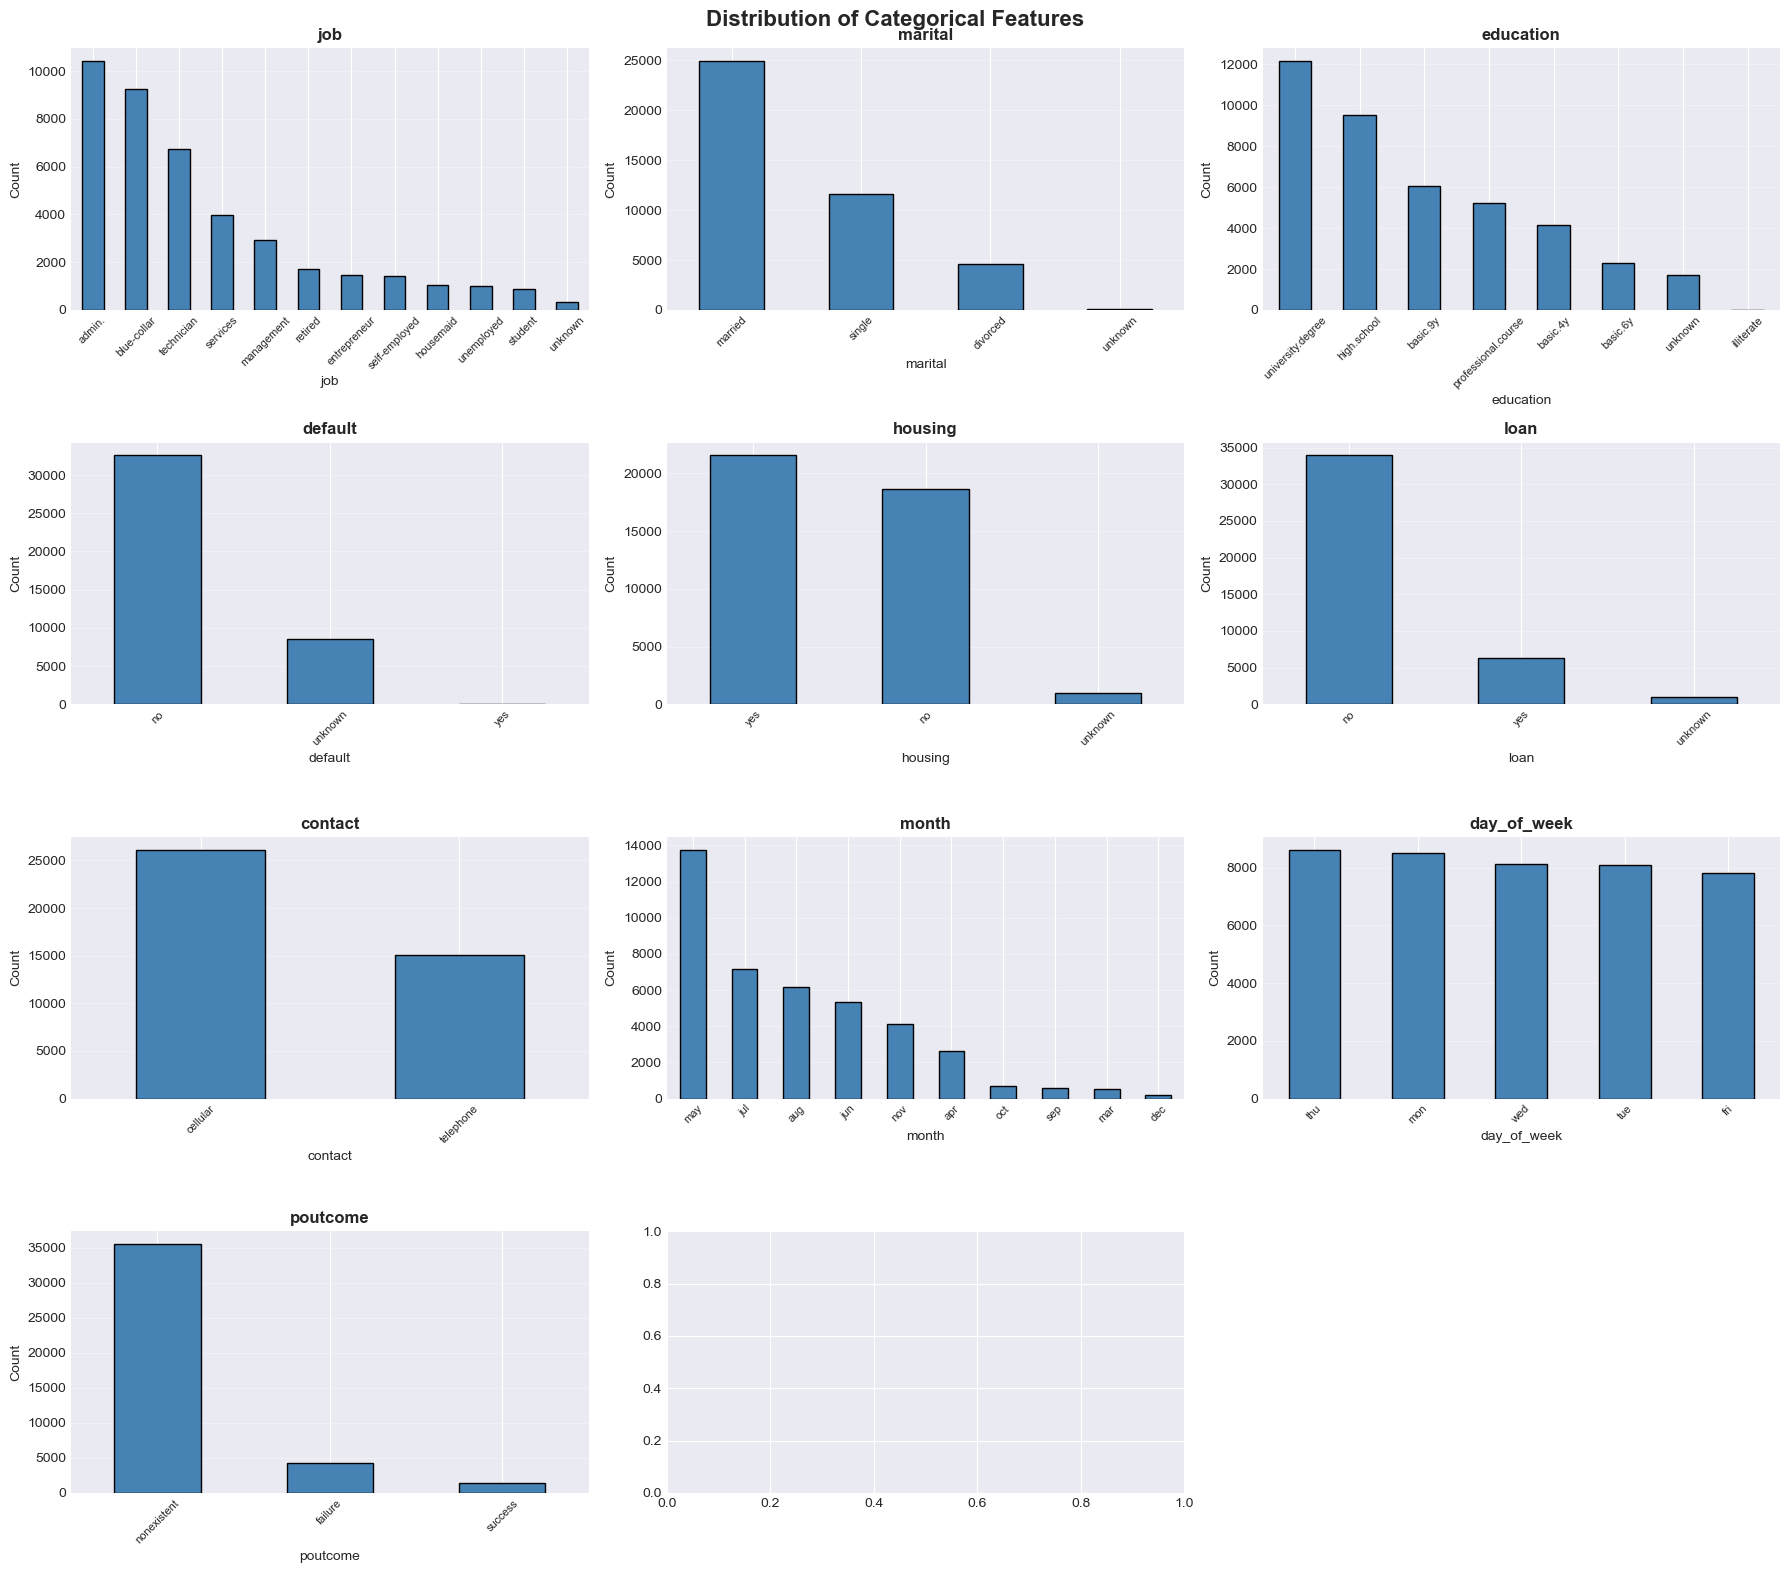

In [32]:
# Understanding Categorical Features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
   
n_cols = 3
n_rows = (len(categorical_features) + n_cols - 1) // n_cols
   
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()
   
for idx, feature in enumerate(categorical_features):
    if feature == 'y':  # Skip target (analyzed separately)
        continue
    value_counts = df[feature].value_counts()
    value_counts.plot(kind='bar', ax=axes[idx], color='steelblue', edgecolor='black')
    axes[idx].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Count', fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45, labelsize=8)
    axes[idx].grid(axis='y', alpha=0.3)
   
# Hide empty subplots
for idx in range(len(categorical_features), len(axes)):
    axes[idx].axis('off')
   
plt.suptitle('Distribution of Categorical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [33]:
print("Categorical Features Summary:")

for col in categorical_features:
    if col == 'y':
        continue
    print(f"\n{col.upper()}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Most common: {df[col].mode()[0]} ({df[col].value_counts().iloc[0]:,} occurrences)")
    print(f"  Value counts:")
    print(df[col].value_counts())

Categorical Features Summary:

JOB:
  Unique values: 12
  Most common: admin. (10,422 occurrences)
  Value counts:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

MARITAL:
  Unique values: 4
  Most common: married (24,928 occurrences)
  Value counts:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

EDUCATION:
  Unique values: 8
  Most common: university.degree (12,168 occurrences)
  Value counts:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

DEFAULT:
  Uni

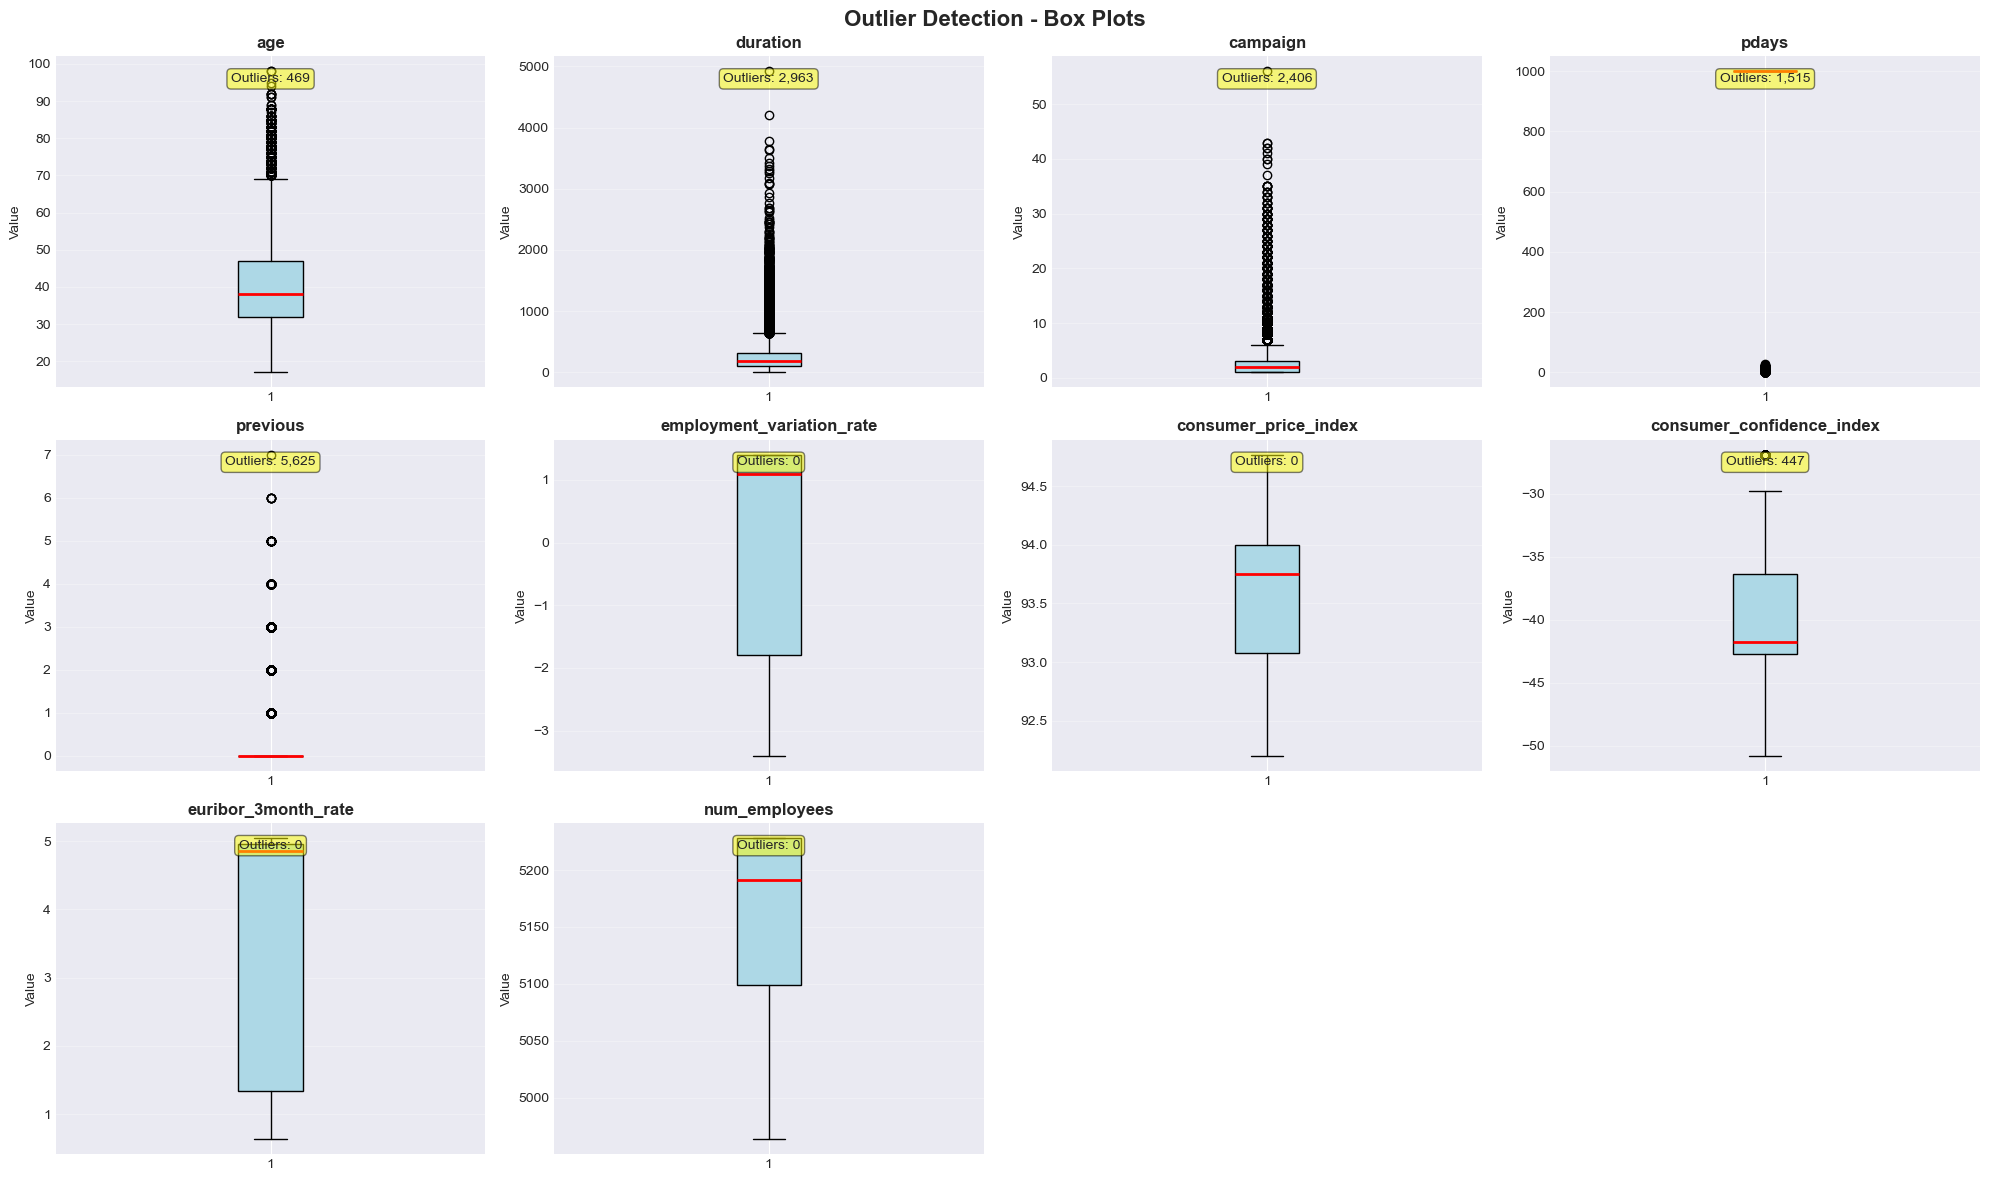


OUTLIER ANALYSIS:
Red line = Median | Box = IQR (25th-75th percentile) | Whiskers = 1.5×IQR

Notable outliers:
• campaign: Some clients contacted 50+ times (extreme persistence)
• duration: Some very long calls (may indicate engaged customers)
• age: Some very young/old clients (edge cases)

Decision: Will handle outliers during data cleaning phase


In [31]:
# Outlier Detection
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
axes = axes.flatten()

for idx, feature in enumerate(numerical_features):
    bp = axes[idx].boxplot(df[feature], vert=True, patch_artist=True,
                            boxprops=dict(facecolor='lightblue', color='black'),
                            whiskerprops=dict(color='black'),
                            capprops=dict(color='black'),
                            medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Value', fontsize=10)
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Calculate and display outlier count
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    axes[idx].text(0.5, 0.95, f'Outliers: {len(outliers):,}', 
                   transform=axes[idx].transAxes, ha='center', va='top',
                   bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

# Hide empty subplots
for idx in range(len(numerical_features), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Outlier Detection - Box Plots', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('outlier_detection.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nOUTLIER ANALYSIS:")
print("Red line = Median | Box = IQR (25th-75th percentile) | Whiskers = 1.5×IQR")
print("\nNotable outliers:")
print("• campaign: Some clients contacted 50+ times (extreme persistence)")
print("• duration: Some very long calls (may indicate engaged customers)")
print("• age: Some very young/old clients (edge cases)")
print("\nDecision: Will handle outliers during data cleaning phase")

### 2.3.2 Understanding relationship between variables

Before correlation calculation:
df_encoded['y'] dtype: int64
df_encoded['y'] unique: [0]


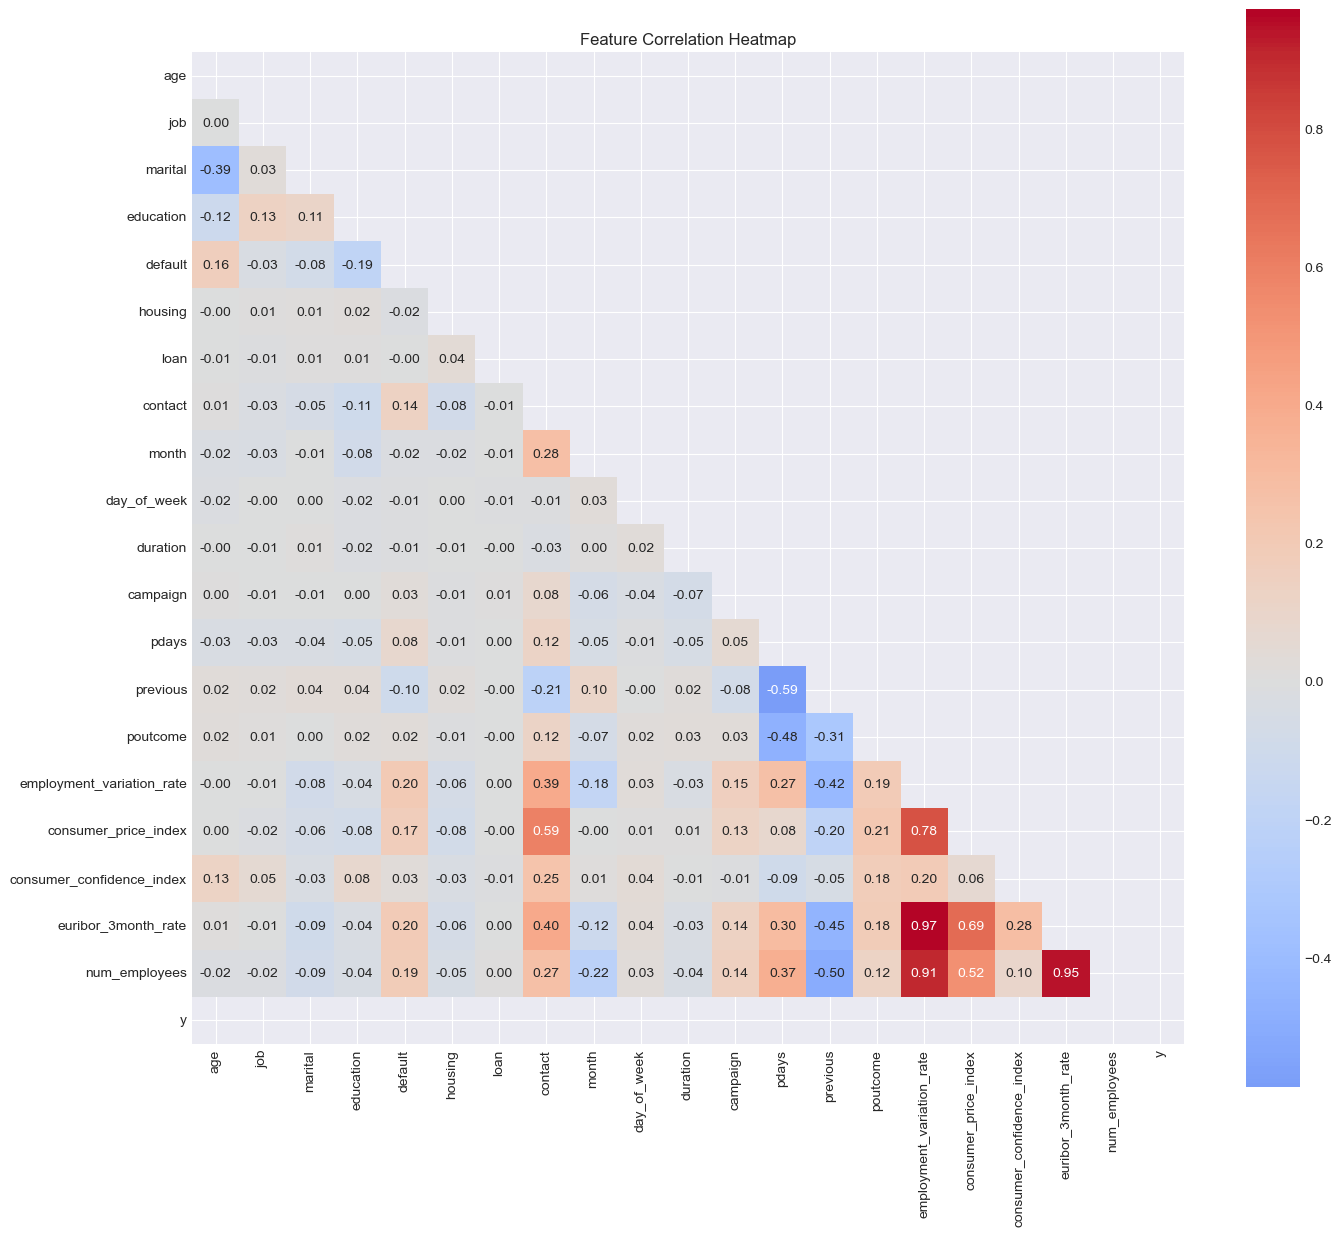

In [47]:
# Correlation heatmap
# Create encoded copy for correlation analysis
df_encoded = df.copy()

# Encode categorical variables
le = LabelEncoder()
for col in categorical_features:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Encode target
df_encoded['y'] = (df_encoded['y'] == 'yes').astype(int)

print("Before correlation calculation:")
print(f"df_encoded['y'] dtype: {df_encoded['y'].dtype}")
print(f"df_encoded['y'] unique: {df_encoded['y'].unique()}")

# Correlation matrix
correlation_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
            center=0, fmt='.2f', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# Finding highly correlated feature pairs (multicollinearity check)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    print("HIGH CORRELATION PAIRS (|r| > 0.8):")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"{feat1} <-> {feat2}: {corr:.3f}")

HIGH CORRELATION PAIRS (|r| > 0.8):
employment_variation_rate <-> euribor_3month_rate: 0.972
employment_variation_rate <-> num_employees: 0.907
euribor_3month_rate <-> num_employees: 0.945


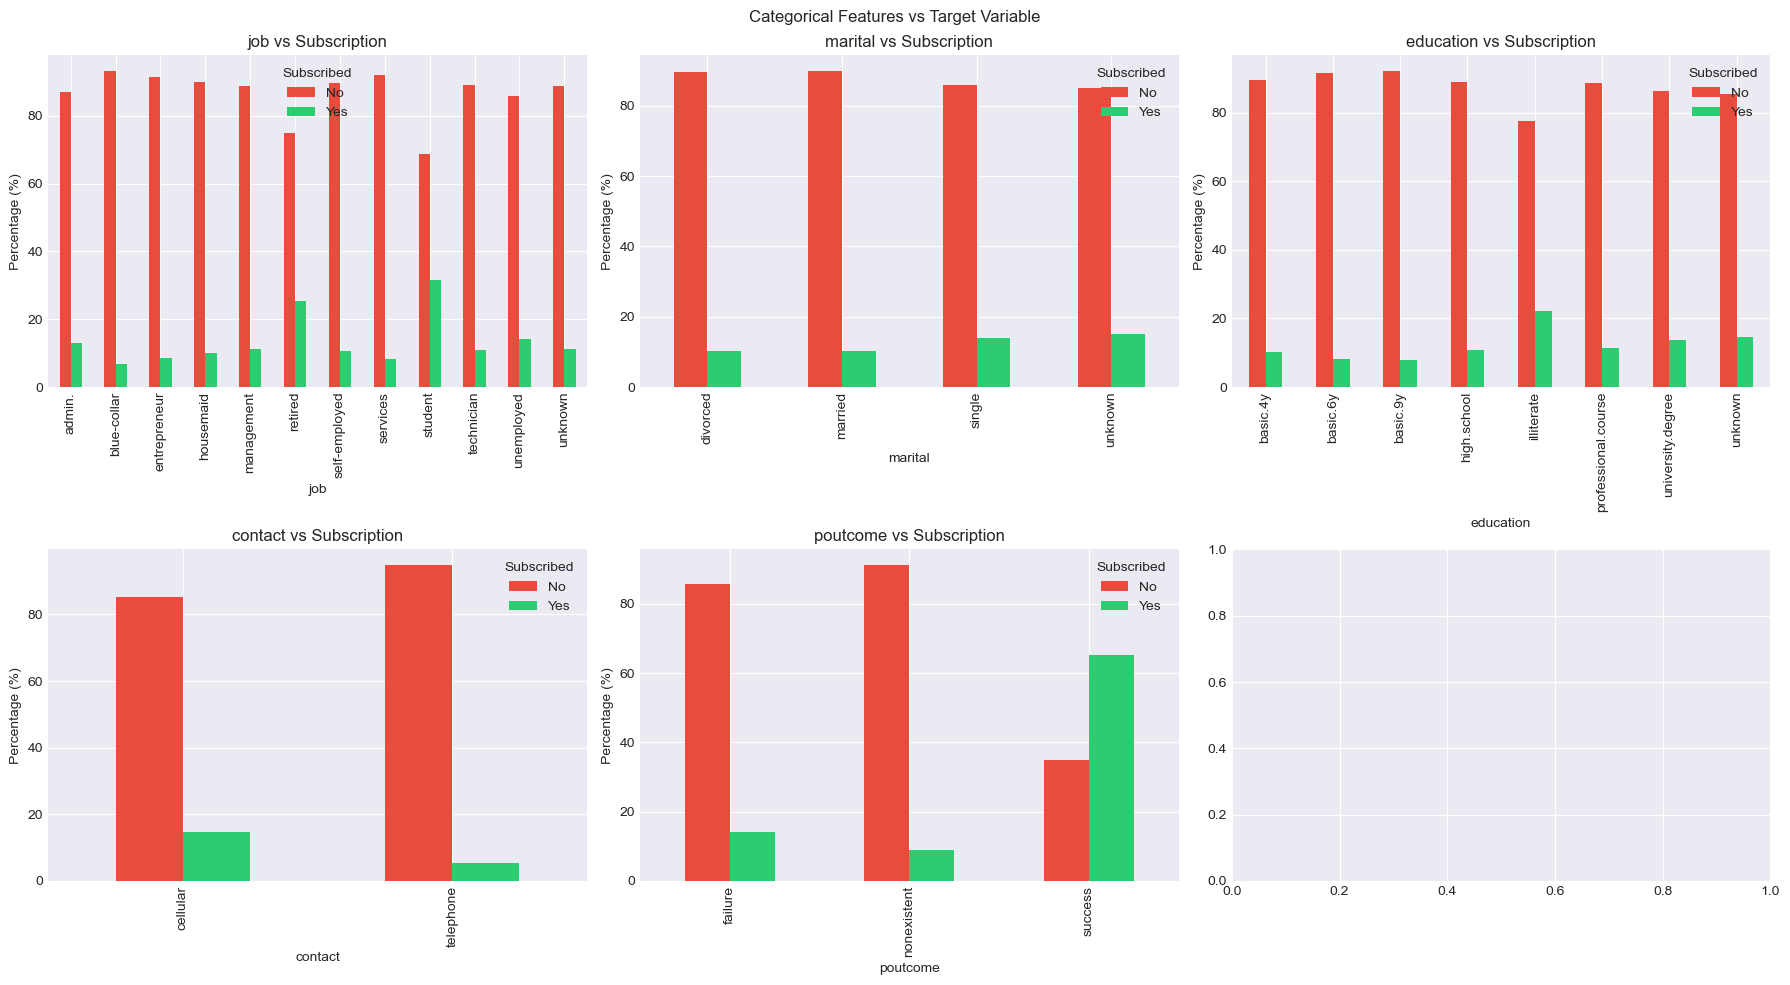

In [46]:
# Analyze relationship between key categorical features and target
key_categorical = ['job', 'marital', 'education', 'contact', 'poutcome']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_categorical):
    # Create crosstab
    ct = pd.crosstab(df[feature], df['y'], normalize='index') * 100
    
    ct.plot(kind='bar', stacked=False, ax=axes[idx], 
            color=['#e74c3c', '#2ecc71'])
    axes[idx].set_title(f'{feature} vs Subscription')
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].legend(['No', 'Yes'], title='Subscribed')

plt.suptitle('Categorical Features vs Target Variable')
plt.tight_layout()
plt.show()

# 3. Data Preparation

## 3.1 Data Cleaning

In [ ]:
## Clean data

## 3.2 Train-Test Split

In [ ]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [ ]:
## Initialise and train model


# 5. Model Evaluation

In [ ]:
## Evaluate model


In [ ]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection